# Boston Airbnb Exploratory Data Analysis


**Team 1**:
Cooper  Redpath, Dan Liu, Marielis Rosario Hernandez, Ming Zou, Subhanshu Pandey

**Context:**
Using listing data from Airbnb, we will analyze the major factors that impact owning an AirBnb in Boston and understanding how to be more profitable. 


**Problem:**
As an owner of AirBnb, how can you correctly price and  maximize profits for a rental  property in the Greater Boston area based on comparative rentals, location, amenities and other attributes?


**Assignment Description: **
The descriptive and prescriptive analyses below provide a basic review of a few key factors that may contribute to identifying potential solutions to the problem above. 

**Data Source**: Airbnb Boston Public Data

In [59]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving listings.csv to listings (1).csv
User uploaded file "listings.csv" with length 14554900 bytes


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Dataset Summary**

3585 listings in total with 95  different attributes. From the dataset we are trying to focus on the price of listings based on variety of factors including locations, hosts, reviews and types of accomodations. The dataset was from 2016.

In [61]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,2.020000e+13,9/7/2016,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.020000e+13,9/7/2016,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.020000e+13,9/7/2016,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,2.020000e+13,9/7/2016,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,2.020000e+13,9/7/2016,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [0]:
listings = listings[['price', 'accommodates', 'bedrooms', 'bathrooms', 'neighbourhood_cleansed','host_response_rate', 'host_acceptance_rate', 
                     'host_is_superhost', 'review_scores_rating','cancellation_policy']]

In [63]:
listings.head()

,price,accommodates,bedrooms,bathrooms,neighbourhood_cleansed,host_response_rate,host_acceptance_rate,host_is_superhost,review_scores_rating,cancellation_policy
0,250,4,2.0,1.5,Roslindale,NaN,NaN,f,NaN,moderate
1,65,2,1.0,1.0,Roslindale,1.0,1.00,f,94.0,moderate
2,65,2,1.0,1.0,Roslindale,1.0,0.88,t,98.0,moderate
3,75,4,1.0,1.0,Roslindale,1.0,0.50,f,100.0,moderate
4,79,2,1.0,1.5,Roslindale,1.0,1.00,t,99.0,flexible


In [0]:
listings["bedrooms"].fillna(listings["bedrooms"]==0, inplace=True)
listings["bathrooms"].fillna(listings["bathrooms"]==1, inplace=True)

# Average Airbnb Cost

The average Airbnb price in Boston area is $173.93 per night.

In [64]:
listings['price'].mean()

173.9258019525802

# Price vs. Accommodates

Based on the regression line in the scatter plot below, the more people an Airbnb property can host, the more it would cost per night.

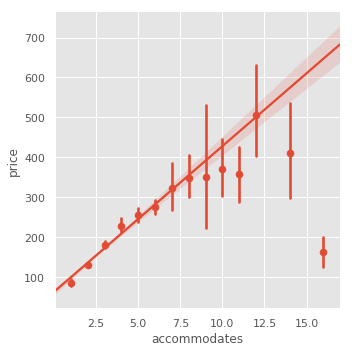

In [65]:
%matplotlib inline
plt.style.use('ggplot')
sns.lmplot(x="accommodates", y="price", data=listings, x_estimator=np.mean)

#  Price vs. Review Score Rating

Majority of Airbnb properties have review score above 80. The variance in prices grows as the score increases.

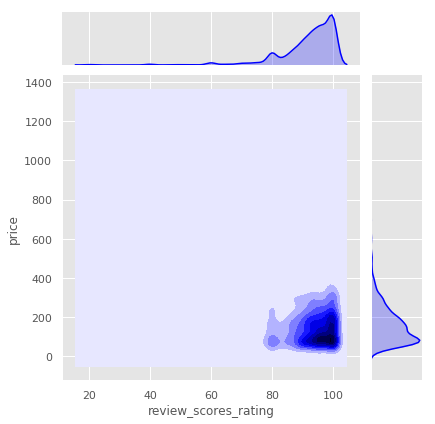

In [66]:
sns.jointplot(x="review_scores_rating", y="price", data=listings, 
              kind="kde", color="blue")


# Airbnb Price Distribution

The most expensive Airbnb property in Boston can cost more than \\$4000 per night. However, as calculated above, the average Airbnb price is around $173.93\. And majority of property prices are concentrated around the average price level, as evidence shown in the violin plot below.

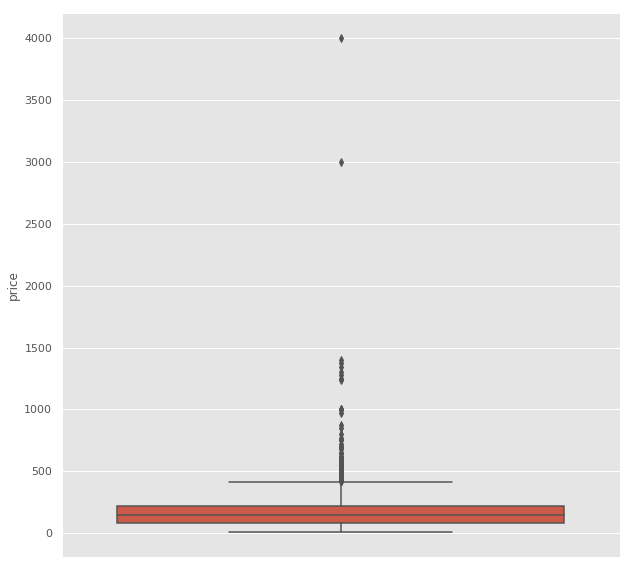

In [67]:
plt.figure(figsize=(10,10))
sns.boxplot(y="price", data=listings)

# Distribution of Airbnb Prices by Neighbourhood

After breaking down the data by different neighbourhoods, we can tell "Fenway" and "South Boston Waterfront" have the most expensive Airbnb properties in the market. And "Mattapan" seems to have the cheapest Airbnb price on average.

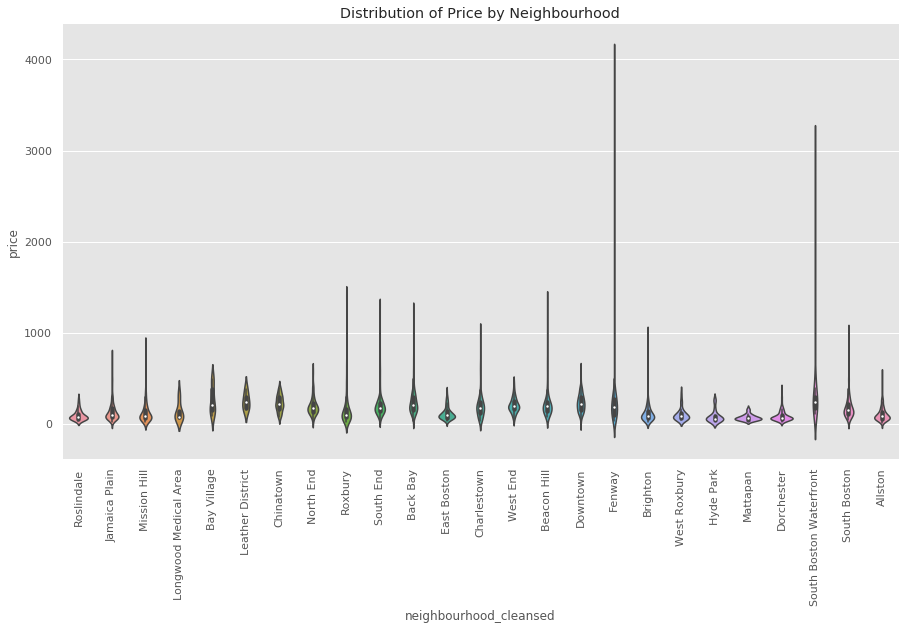

In [68]:
plt.figure(figsize=(15,8))
sns.violinplot(x="neighbourhood_cleansed", y="price", data=listings)
plt.xticks(rotation=90)
plt.title("Distribution of Price by Neighbourhood")
sns.despine()

# Different Bedrooms & Bathrooms Combination

The pivot table below is showing average prices of different combination of bedrooms & bathrooms. The maximum amount of bedrooms an Airbnb property has is 5. And you can find an property with 6 bathrooms at most. "3Bed+3.5Bath" seems to be the most expensive property type. 

In [69]:
listings.pivot_table(values='price', index='bedrooms', columns = 'bathrooms', aggfunc='mean')

bathrooms,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0
bedrooms,,,,,,,,,,,,
0.0,60.0,NaN,153.802817,200.000000,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,NaN
1.0,163.5,56.714286,142.384578,98.515385,99.984733,86.516129,97.857143,77.500000,NaN,NaN,106.25,163.0
2.0,NaN,NaN,221.516667,266.407407,299.840909,406.000000,NaN,NaN,NaN,NaN,399.00,NaN
3.0,NaN,NaN,236.818182,304.000000,331.142857,380.857143,492.600000,683.333333,NaN,NaN,NaN,NaN
4.0,NaN,NaN,282.400000,279.333333,384.666667,465.000000,375.000000,475.000000,412.5,NaN,NaN,NaN
5.0,NaN,NaN,100.000000,466.666667,310.166667,322.500000,554.000000,450.000000,NaN,1300.0,NaN,NaN


# Average Airbnb Prices in Different Neighbourhoods

The pivot table below is showing the average Airbnb prices in different neighbourhoods based on how many people a property can host. For example, if a group of 4 people is looking for an Airbnb in Allston, they can use the $155.49 average price as their reference. The maximum amount people an Airbnb property can host in Boston area is 16, and it's located in Roslindale.

In [70]:
listings.pivot_table(values='price', columns='accommodates', index = 'neighbourhood_cleansed', aggfunc='mean')

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,14,16
neighbourhood_cleansed,,,,,,,,,,,,,,
Allston,58.297872,87.978261,133.466667,155.485714,243.857143,252.000000,266.333333,439.500000,459.000000,259.00,NaN,NaN,NaN,NaN
Back Bay,104.266667,191.210526,212.319149,289.776119,324.382353,379.388889,367.000000,228.333333,NaN,NaN,NaN,NaN,NaN,NaN
Bay Village,NaN,138.428571,219.666667,287.555556,500.000000,188.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beacon Hill,128.222222,183.835052,238.074074,281.156250,297.500000,308.555556,622.250000,423.200000,NaN,NaN,NaN,NaN,NaN,NaN
Brighton,100.083333,87.252874,135.100000,145.444444,155.250000,204.461538,NaN,250.000000,NaN,500.00,400.0,450.000000,NaN,NaN
Charlestown,116.076923,141.775000,228.125000,212.681818,314.500000,309.916667,326.000000,382.666667,NaN,NaN,NaN,NaN,NaN,NaN
Chinatown,100.000000,194.100000,206.956522,246.687500,281.400000,275.500000,119.000000,379.000000,NaN,NaN,NaN,NaN,NaN,NaN
Dorchester,54.561644,79.186916,81.782609,130.393939,116.000000,184.705882,199.000000,262.500000,199.666667,225.00,NaN,NaN,395.0,NaN
Downtown,163.166667,225.000000,196.387097,278.370370,177.222222,337.272727,234.600000,158.000000,NaN,350.00,NaN,NaN,NaN,NaN


# Price vs. Host Response/Acceptance Rate

Two scatter plots below are showing the price distribution based on host's response/acceptance rate. Blue dots are used to represent Airbnb Super Hosts. As we can see, majority of Super Hosts tend to have 100% response/acceptance rate. Most of Airbnb property owners have been very responsive (above 90%). However, there is no strong correlation between price and host response/acceptance rate.

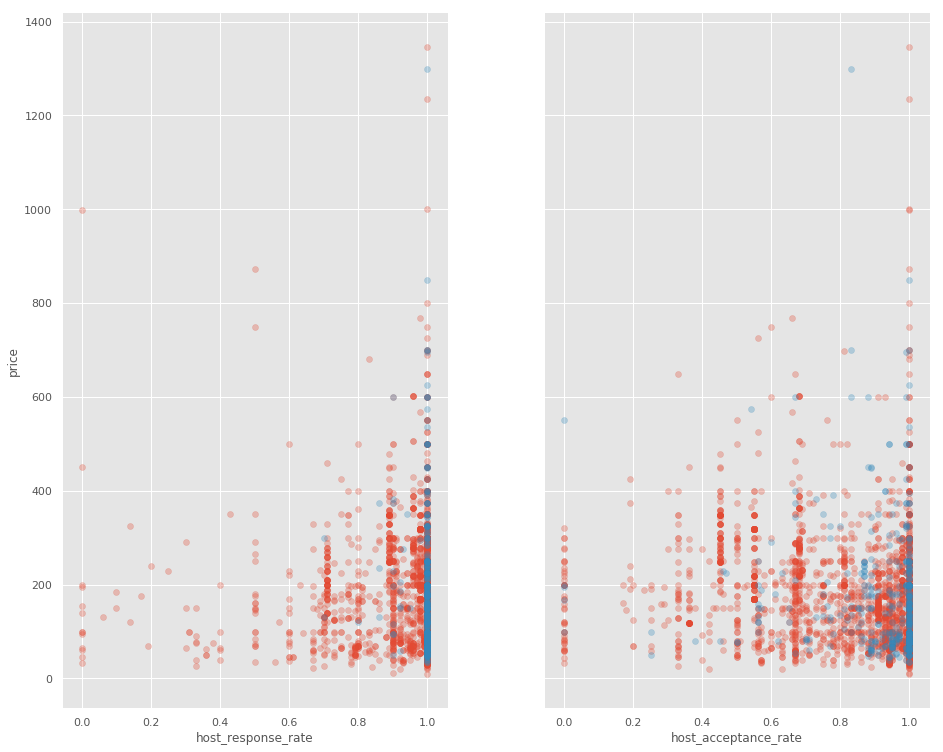

In [71]:
g = sns.PairGrid(listings, y_vars=["price"], x_vars=["host_response_rate", "host_acceptance_rate"], hue="host_is_superhost", aspect=1.1)
g.fig.set_size_inches(15,15)
ax = g.map(plt.scatter, alpha=0.3)

# Price vs. Cancellation Policy

According to the bar chart below, more expensive properties tend to have more strict cancellation policy, which could be interpretated as a way that Airbnb hosts are using to reduce risks.

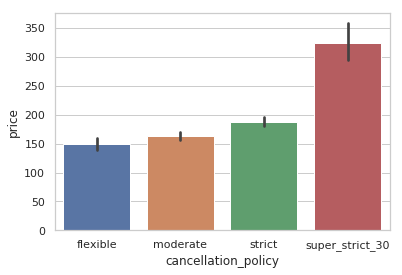

In [72]:
sns.set(style="whitegrid")
ax = sns.barplot(x="cancellation_policy", y="price", data=listings, order = ['flexible', 'moderate', 'strict', 'super_strict_30'])

# Correlation Heat Map

In order to understand the relationships between some key variables that may be drivers of price.

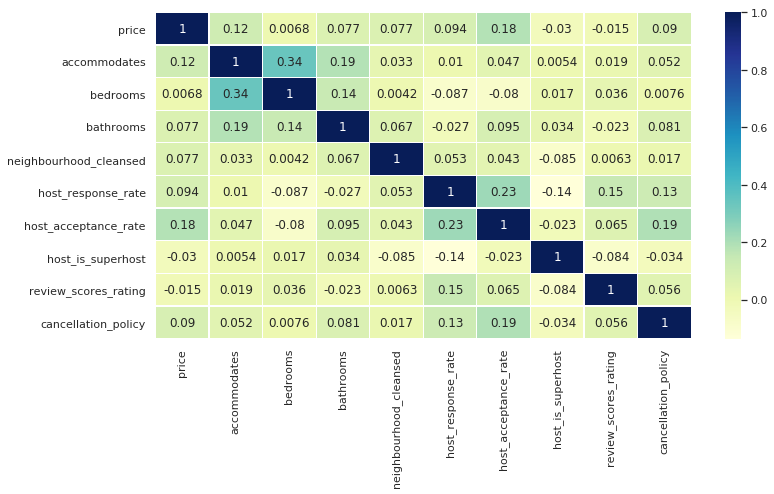

In [74]:
plt.figure(figsize=(12, 6))
listings_corr = listings[['price', 'accommodates', 'bedrooms', 'bathrooms', 'neighbourhood_cleansed','host_response_rate', 
                          'host_acceptance_rate', 'host_is_superhost', 'review_scores_rating','cancellation_policy']]
corr = listings_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, linewidths=.2, cmap="YlGnBu", annot=True)

# Regression Model

In [81]:
listings.isnull().sum()

price                       0
accommodates                0
bedrooms                    0
bathrooms                   0
neighbourhood_cleansed      0
host_response_rate        471
host_acceptance_rate      471
host_is_superhost           0
review_scores_rating      813
cancellation_policy         0
dtype: int64

In [0]:
listings.drop(['host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)

In [0]:
listings = pd.get_dummies(listings, columns=['neighbourhood_cleansed', 'host_is_superhost', 
                                     'cancellation_policy'])

In [0]:
listings.drop(['neighbourhood_cleansed_Roslindale', 'host_is_superhost_f', 
                                     'cancellation_policy_moderate'], axis=1, inplace=True)

In [0]:
listings['bedrooms']=listings['bedrooms'].astype(int)
listings['bathrooms']=listings['bathrooms'].astype(int)

In [100]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 33 columns):
price                                             3585 non-null int64
accommodates                                      3585 non-null int64
bedrooms                                          3585 non-null int64
bathrooms                                         3585 non-null int64
review_scores_rating                              2772 non-null float64
neighbourhood_cleansed_Allston                    3585 non-null uint8
neighbourhood_cleansed_Back Bay                   3585 non-null uint8
neighbourhood_cleansed_Bay Village                3585 non-null uint8
neighbourhood_cleansed_Beacon Hill                3585 non-null uint8
neighbourhood_cleansed_Brighton                   3585 non-null uint8
neighbourhood_cleansed_Charlestown                3585 non-null uint8
neighbourhood_cleansed_Chinatown                  3585 non-null uint8
neighbourhood_cleansed_Dorchester                 3

In [0]:
listings_1=listings[listings.review_scores_rating.notnull()]

In [85]:
listings_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 1 to 3583
Data columns (total 8 columns):
price                     2772 non-null int64
accommodates              2772 non-null int64
bedrooms                  2772 non-null object
bathrooms                 2772 non-null object
neighbourhood_cleansed    2772 non-null object
host_is_superhost         2772 non-null object
review_scores_rating      2772 non-null float64
cancellation_policy       2772 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 194.9+ KB
